# Designing a Neural Network Architecture for Image Recognition

In [1]:
# Image
from PIL import Image, ImageDraw
import PIL
import face_recognition # access to the face detection model in DLIB

# System
import os
import sys

# # Deep learning
# import tensorflow as tf
# import tensorflow.keras
import keras

print('These are the current versions working for me as of 2019-07-13')
# print(f"TensorFlow Version: {tf.__version__}")
# print(f"TensorFlow Keras Version: {tensorflow.keras.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
# print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Using TensorFlow backend.


These are the current versions working for me as of 2019-07-13
Keras Version: 2.2.4

Python 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


-------------------------------

## Most Basic Neural Network

This is the most basic neural network design. We feed it an image, it passes through one or more dense layers, and then it returns an output, but this kind of design doesn't work efficiently for images because objects can appear in lots of different places in an image.

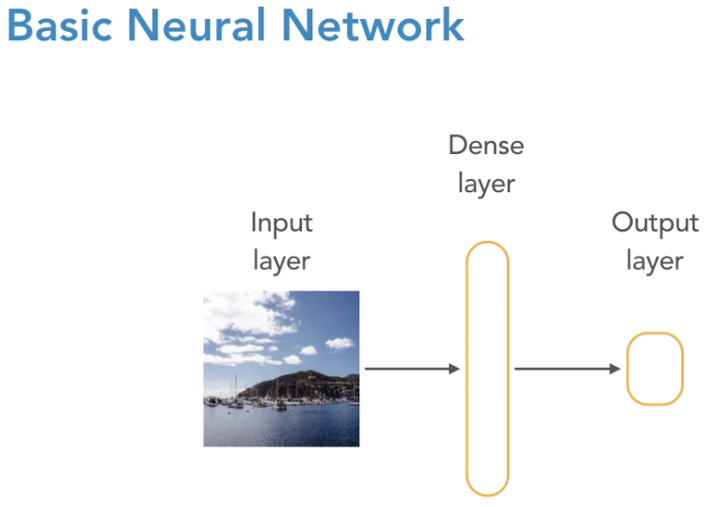

In [2]:
Image.open('Images/12-basic-nn.png')

## Solution to Basic NN by Adding a Convolutional Layer
The solution is to add one or more convolutional layers to our neural network. These layers will help us detect patterns no matter where they appear in our image.

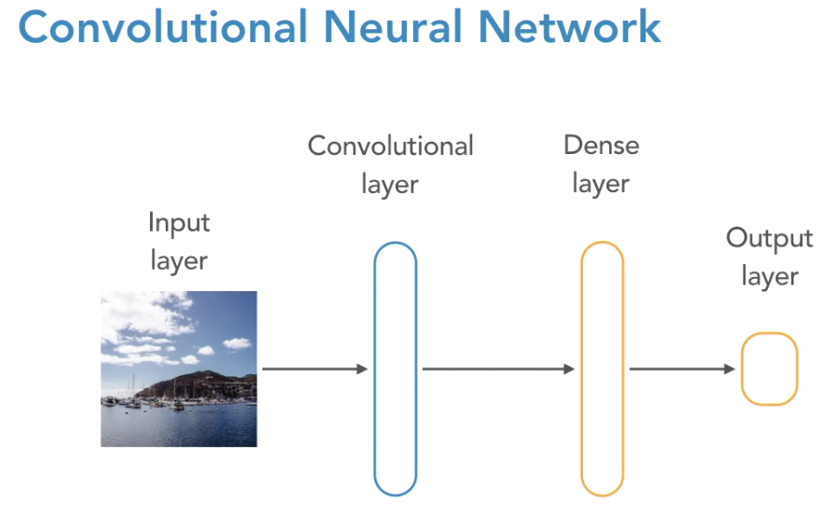

In [3]:
Image.open('Images/13-cnn.png')

### Another Problem: Convolutional Layer Not Knowing the Location
It can be effective to put two or more convolutional layers in a row, so in our neural network, we'll add them in pairs. 

Our design so far, with two convolutional layers and the dense layer, would work for very simple images, but there are some tricks that we can add to our neural network to make it more efficient. 

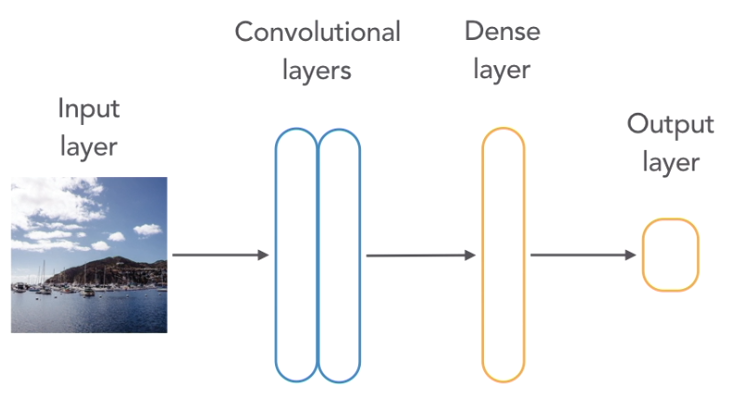

In [4]:
Image.open('Images/14-cnn-two.png')

## Max Pooling

The convolutional layers are looking for patterns in our image and recording whether or not they found those patterns in each part of our image, but we don't usually need to know exactly where in an image a pattern was found down to the specific pixel. 

It's good enough to know the __rough location__ of where it was found.

#### Solution
To solve this problem, we can use a technique called max pooling. 

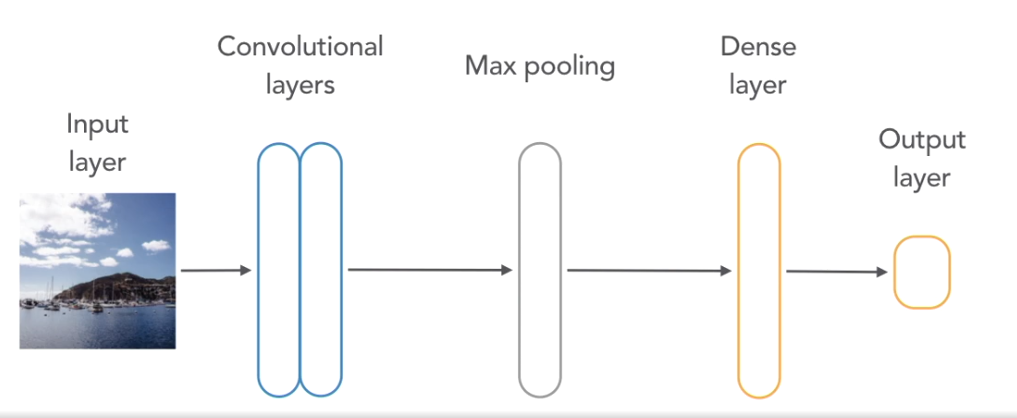

In [5]:
Image.open('Images/15-max-pooling-nn.png')

## Max Pooling Grid

Let's look at an example. Imagine that this grid is the output of a convolutional filter that ran over a small part of our image. It's trying to detect a particular pattern and these numbers represent whether or not that pattern was found in the corresponding part of the image. 

Let's assume that this filter is looking for patterns that look like clouds. A zero in the grid means that the pattern wasn't found at all and a one means the area was a strong match for the pattern. We could pass this information directly to the next layer in our neural network, but if we can reduce the amount of information that we pass to the next layer, it will make the neural network's job easier. 

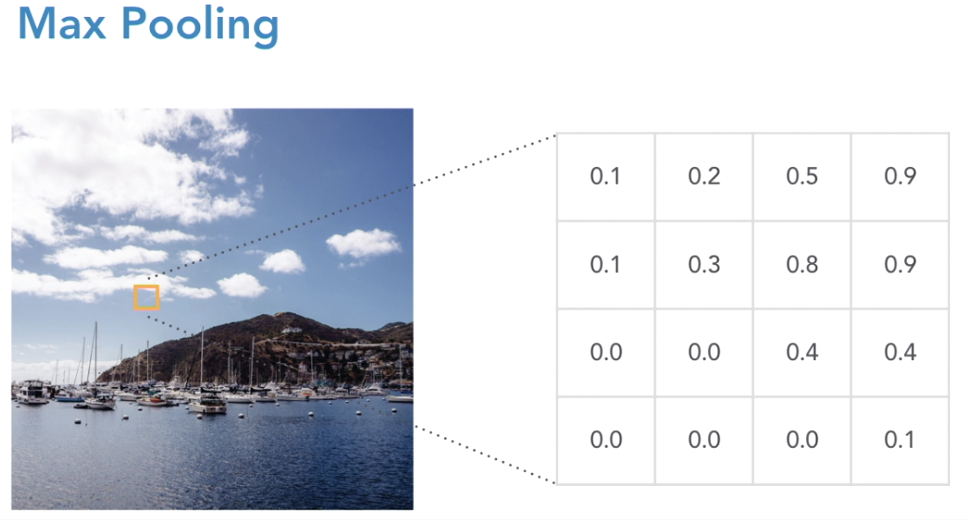

In [6]:
Image.open('Images/16-max-pooling.png')

## Max Pooling Function
The idea of __max pooling is to down sample the data by only passing on the most important bits__. 
1. Divide the grid into 2x2 squares and pick the largest number
    - It works like this. First, we divide this grid into two-by-two squares. Then, within each two-by-two square, we'll find the largest number. If there's a tie, we'll just grab the first one. 
    
    
2. Create a new array with the biggest number
    - Finally, we'll create a new array that only saves the numbers that we selected. 
    - The idea is that we're still capturing roughly where each pattern was found in our image, but we're doing it with 1/4 as much data. We'll get nearly the same end result, but they'll be a lot less work for the computer to do in the following layer of the neural network.

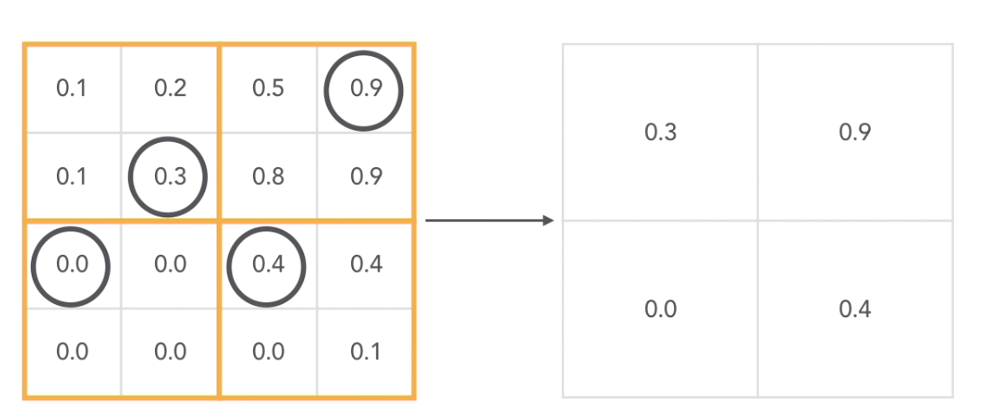

In [7]:
Image.open('Images/17-max-pooling-grid.png')

## Dropout (Another Method w/ Max Pooling)

We have another trick that we can use to make our neural network more robust, it's called dropout. 

### Neural Network Remembering vs. Learning Problem
One of the problems with neural networks is that they tend to memorize the input data instead of actually learning how to tell different objects apart. We need a way to prevent that. There's a simple way that we can force the neural network to try really hard to learn within just memorizing its training data. 

### Adding a Dropout Layer
The idea is that we'll add the __dropout layer__ between other layers that will randomly throw away some of the data passing through it by cutting some of the connections in the neural network. It's like going into a computer and just randomly unplugging some cables. 

### Neural Network Learning
By randomly cutting different connections with each training image, the neural network is forced to try harder to learn. It has to learn multiple ways to represent the same ideas because it can't depend on any particular signal always flowing through the neural network. 

It's called __dropout__ because we're just letting some of the data drop out of the network randomly. Dropout is an idea that might seem counterintuitive, we're actually throwing away data to get a more accurate final result, but in practice it works really well. 

## Four Layers
We have four different kinds of layers in this neural network. The convolutional layers add:
1. Translational Invariance
2. Max Pooling Layers to down sample the data
3. Dropout forces the neural network to learn in a more robust way
4. Dense layer maps the output of the previous layers to the output layer so we can predict which class the image belongs to

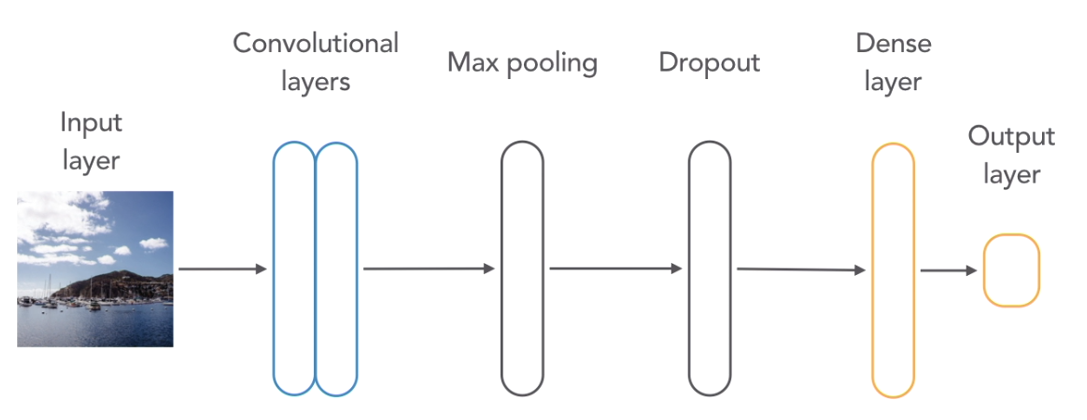

In [8]:
Image.open('Images/18-dropout-nn.png')

## Convolutional Block

The first three layers work really well together, so we'll put them together into a block and we'll call the whole thing a __convolutional block__.

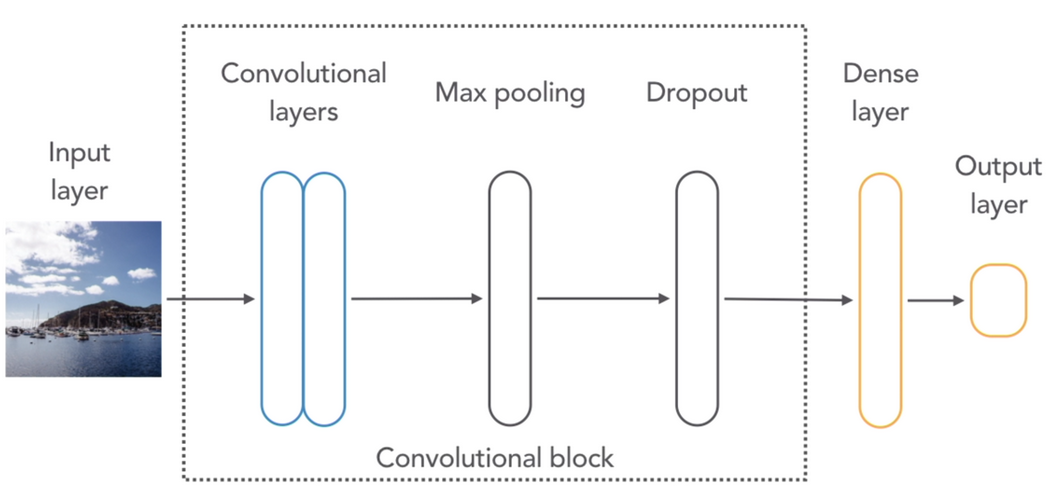

In [9]:
Image.open('Images/19-convo-block.png')

## Multiple Convolutional Block

If we wanna make our neural network more powerful and able to recognize more complex images, we can add more layers to it. But instead of just adding layers randomly, we'll add more copies of our convolutional block. 

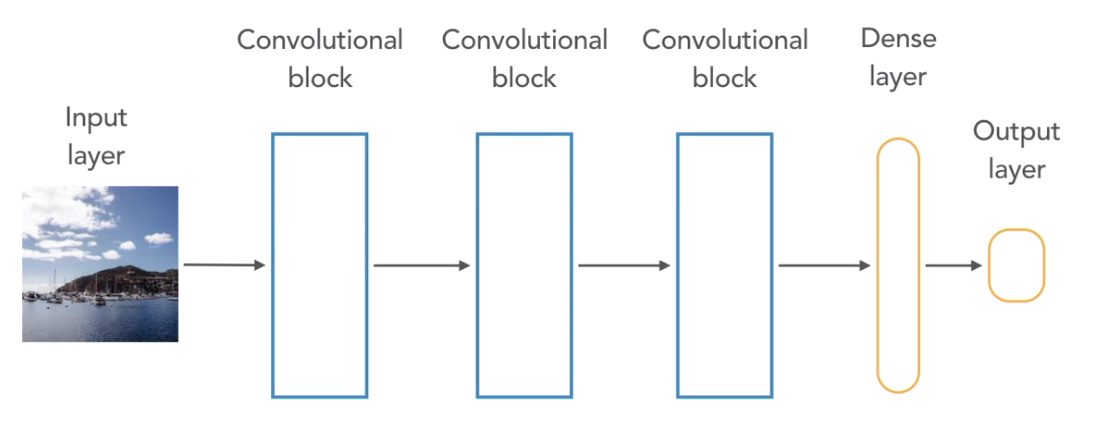

In [10]:
Image.open('Images/20-multi-convo-blocks.png')

## Result

When all these layers are working together, we'll be able to detect complex objects like dogs or cars or airplanes. 

## Typical Design for Image Recognition Neural Network
This is a very typical design for an image recognition neural network, but it's also one of the most basic. Researchers are always experimenting with new and increasingly complex ways of chaining together layers to improve the accuracy of their neural networks. The latest designs involve branching pathways, shortcuts between groups of layers and all sorts of other tricks, but they all build on these same basic ideas and this is the approach we'll use in our code. 

--------------------------------

## Exploring the CIFAR-10 Data Set

To train neural networks to perform accurately, you need large amounts of training data. Since it's difficult to collect thousands of training images, researches build data sets and share them with each other. 

### First Image Recognition Project
For our first image recognition project, we'll be using the CIFAR-10 dataset. This dataset includes thousands of pictures of 10 different kinds of objects, like airplanes, automobiles, birds, and so on. Each image in the dataset includes a matching label so we know what kind of image it is. 

Using this dataset, we can train our neural network to recognize any of these 10 different kinds of object. Before we build an image recognition model, the first step is to look through the training data that we are working with. We want to check for bad or unexpected training data. 

## Explore the Data
### Be Aware of Bad Training Data
Bad training data is a very common source of problems. For example, imagine that you take millions of photographs and ask volunteers to label them for you. This is called crowd sourcing and is a common way to label large data sets. What if one of the labels you ask your volunteers to use is jaguar and you have pictures of both large cats and sports cars? The volunteers might mix up the label and sometimes use it for cats and sometimes use it for sports cars. Because problems like this are common, it's always worth spending some time with your training data and looking for obvious errors or problems. 

### Dataset
The images in the CIFAR-10 dataset are only 32 pixels by 32 pixels with 2 color channels. 

These are very low resolution images. We're using them here because the lower resolution will make it possible to train the neural network to recognize them relative quickly. With the same code we'll write, we'll also work for larger image sizes. To make it easy for you to look through the CIFAR-10 dataset I've included some code that will display the images from the dataset on the screen. 

### CIFAR-10 Specifications
- Images are 32x32 pixels with 2 color channels
- 10 different types, or classes of objects
- 60,000 total images
- 5,000 training images and 1,000 test images per class

### Image Recognition of CIFAR-10 Dataset

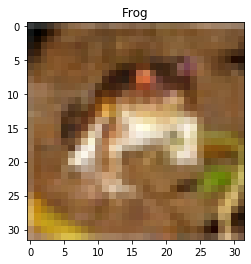

In [11]:
from keras.datasets import cifar10 # cifar10 is a module; type(cifar10)
import matplotlib.pyplot as plt
%matplotlib inline

# Create a dictionary to store a list of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

# Load the entire data set using load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # helper function

# Loop through each picture in the data set
for i in range(1):
    
    # Grab an image from the data set
    sample_image = x_train[i] # x_train is a numpy.ndarray; type(x_train)
    
    # Grab the image's expected class id (label)
    image_class_number = y_train[i][0] # y_train is a numpy.ndarray; type(x_train); array([6]) with [0] to 6 
    
    # Look up the class name from the class id and label it
    image_class_name = cifar10_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    
    # Label the image
    plt.title(image_class_name)
    
    # Show the plot on the screen
    plt.show()

In [12]:
y_train[0]

array([6], dtype=uint8)

-------------------------------

## Loading Image Dataset & Train the Model

### Step 1 - Create Basic Model with 1 layer

### ************* Notes will be available in the full model *************

In [13]:
import keras
from keras.datasets import cifar10
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

####################################################################################
###### Load & clean the data to a usable format
####################################################################################

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255 # divide NumPy array by a single value
x_test = x_test / 255

# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9 because CIFAR provides 10 classes
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0
y_train = keras.utils.to_categorical(y_train, 10) # pass in your array with the labels
y_test = keras.utils.to_categorical(y_test, 10)

####################################################################################
###### Creating the neural network
####################################################################################

# Create a model and add layers
model = keras.models.Sequential() # create a new neural network object 

# Add first layer
model.add(keras.layers.Dense(512, activation='relu', input_shape=(32, 32, 3))) # add input for first layer

# Add output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# Print a summary of the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 512)       2048      
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 10)        5130      
Total params: 7,178
Trainable params: 7,178
Non-trainable params: 0
_________________________________________________________________


### Visualizing Model

When we're building a neural network and adding layers to it, it's helpful to print out a list of the layers in the neural networks so far using model.summary()

### Step 2 - Add in rest of the layers + comments

### *Note: Full model will be written without comments for readability at the end. *

In [14]:
import keras
from keras.datasets import cifar10
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

####################################################################################
###### Load & clean the data to a usable format
####################################################################################

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

'''
 Neural networks work best when the input data are floating point values in between 
 zero and one. Normally images are stored as integer values for each pixel is a number 
 between zero and 255. So to use this data, we need to convert it from integer the floating 
 point and then we need to make sure all the values are between zero and one. 
 Let's convert the data to floating point values. We can do that by using the as type function 
 and passing in float 32. 
'''

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255 # divide NumPy array by a single value
x_test = x_test / 255

'''
 Cifar10 provides the labels for each class as values from zero to nine. But since we are 
 creating a neural network with 10 outputs, we need a separate expected value for each of 
 those outputs. So we need to convert each label from a single number into an array with 10 elements. 
 In that array, one element should be set to one and the rest set to zero. This is something you'll 
 almost always need to do with your training data so keras provides a helper function.
'''

# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9 because CIFAR provides 10 classes
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0
y_train = keras.utils.to_categorical(y_train, 10) # pass in your array with the labels
y_test = keras.utils.to_categorical(y_test, 10)

####################################################################################
###### Creating the neural network
####################################################################################

''' 
 The simplest type of neural network has an input, 
 a densely connected layer and then an output. Let's start by creating that. 

 1. First, create a sequential model, sequential api lets us create a neural network by 
    adding new layers to it one at a time.  It's call sequential because you add each layer 
    in sequence and they automatically get connected together in that order.
'''

# Create a model and add layers
model = keras.models.Sequential() # create a new neural network object 

'''
  Add convolutional layers (32);
  
  1. Convolutional layers are able to look for patterns in an image, no matter where the pattern appears
  in the image. Add in a 2D layer for images (1D for sound waves)

  2. The first parameter is how many different filters should be in the layer? Each filter will be capable 
  of detecting one pattern in the image. We'll start with 32. 
  
  3. Next, we need to pass in the size of the window that we'll use when creating image tiles from each image. 
  Let's use a window size of 3x3 pixels.  This will split up the original image into 3x3 tiles.
  
  Add padding for edges;
  
   4. When we do that, we have to decide what to do with the edges of the image. If the image size isn't exactly 
   divisible by three, we'll have a few extra pixels left over on the edge. We can either throw that information 
   away, or we can add padding to the image. 
   
       Padding is just extra zeros added to the edge of the image to make the math work out. The terminology that 
       Keras uses here is a bit confusing. If we want to add extra padding to the image, it's called same padding. 
       
       There's complex historical reasons why researchers used the term same, but it's easier just to memorize it. 
       For this layer, we do want to have padding, so we'll pass in a parameter padding equals, and the string same, 
       and just like the normal dense layer, convolutional layers also need an activation function. 
'''

# Add a first convolutional layer object
#  params = (filters in the layer, window size, padding, af, input shape first layer)
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 

# Add in a second convolutional layer without padding since an image will not pass through this layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

'''
  Add Max Pooling Layers 1;
  
   Max pooling is where we scale down the output of the convolutional layers by keeping only the largest values 
   and throwing away the smaller ones. This makes the neural network more efficient by throwing away the least 
   useful data and keeping the most useful data. Typically, we'll do max pooling right after a block of 
   convolutional layers. 
   
   1. Create a new max pooling 2D layer with the pool_size parameter with (2, 2). This parameter means that we'll 
   divide the image up into 2x2 squares and only take the large values from each 2x2 region. This will reduce the
   size of our image while keeping the most important values.
   
'''

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

'''
  Add Dropout Layer (1);
  
   One of the problems with neural networks is that they can tend to memorize the input data instead of 
   actually learning how to tell different objects apart. We can force the neural network to try harder to 
   learn without memorizing the input data. 
   
   The idea is that between certain layers, we'll randomly throw away some of the data by cutting 
   some of the connections between the layers. This is called dropout. Usually we'll 
   add dropout right after max pulling layers, or after a group of dense layers. 
  
  1. Create a dropout layer with 25% dropout  
'''

model.add(keras.layers.Dropout(0.25))

'''
  Add convolutional layers (64);
  
  1. Create a second convolutionary layer with 64 filters the same way
'''

# Add in third layer with 64 filters with padding
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
          
# Add in fourth layer with 64 filters without padding
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))     

'''
   Add Max Pooling Layers 2;
   
   Instead of increasing the size of our neural network, they're actually helping us decrease the 
   size by scaling down the data that passes through them while keeping the most important values. 
   This will help us speed up the training process. 
   
   1. Create a second max pooling layer after the next two convolutionary layers the same way
'''

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

'''
  Add Dropout Layer (2);
  
  1. Create a second dropout layer with 25% dropout
'''

model.add(keras.layers.Dropout(0.25))

'''
  Flatten Layer;
  
   Whenever we transition between convolutional layers and dense layers, we need to tell Keras that we're 
   no longer working with 2D data. To do that we need to create a flattened layer and add it to our network. 
   We can do that by calling model.add, and creating a new flattened layer, and there's no parameters required 
   for a flattened layer.
'''   

# Add a flatten layer
model.add(keras.layers.Flatten())

'''
  Add a new layer and pass in a Dense layer object;
  
  1.  First, we need to tell it how many nodes to include in the layer. Let's add 512 nodes 
  to this layer. So we'll just pass in 512. Next we need to tell it what activation function 
  we want to use for this layer. 
  
  Add Activation Function;  
  
  2. For a normal layer like this, a common choice is to use a rectified 
  linear unit or relu activation function. It's the standard choice when working with images because 
  it works well and is computationally efficient.
  
  Input shape for the first layer
  
  3.  All the images in our data set are 32 pixels by 32 pixels and have a red green and blue channel. 
  So for the input size we'll use 32 by 32 by 3.
  
'''

# Add a dense layer
model.add(keras.layers.Dense(512, activation='relu'))

'''
  Add Dropout Layer (3);
  
  1. Create a third dropout layer with 50% dropout
'''

model.add(keras.layers.Dropout(0.50))

'''
   Add an output layer;
   
   We'll need one node in the output layer for each kind of object we want to detect. The cifar10 data set has 
   10 different kinds of objects. Since we're detecting 10 different kinds of objects, we'll create a new dense 
   layer with 10 nodes. 
   
   1. So to do that we'll call model.add and we'll create a new dense object and we know it 
   needs 10 nodes. 
   
   Softmax Classification;
   
   When doing classification with more than one type of object, the output layer will almost 
   always use a softmax activation function. 
   
   What is softmax?
   
   The softmax activation function is a special function that makes sure all the output values from this 
   layer add up to exactly one. The idea is that each output is a value that represents the percent 
   likelihood that a certain type of object was detected. And all 10 values should add up to 100 % or 1. 
'''

# Add output layer
model.add(keras.layers.Dense(10, activation='softmax'))

'''
  Compile the model;
  
  When we compile it, we're telling Keras we actually want to create the neural network in memory. 
  We're also telling Keras how we'll be training it and measuring its accuracy. 

  1. Compile the model with parameters: loss, optimizer, metrics
  
      Loss
          Tell Keras how to check how right or wrong the guesses from our neural network are. 
          This is called the loss function.
          
      Optimizer
          Optimization algorithm we'll use to train the neural network called Adam.
          Adam stands for Adaptive Moment Estimation. 
          
      Metrics
           What metrics we want it to report during the training process. Pass in an array for multiple.
'''

# Compile the model
model.compile(
    loss='categorical_crossentropy', # binary_cross_entropy for 2
    optimizer='adam',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
___________________________

## Reading Model Summary Example

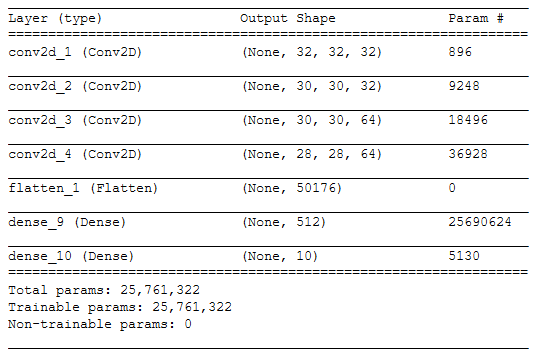

In [15]:
Image.open('Images/21-network-summary.png')

### How to Read Model Summary: 7 Layers

Alright, we can see the neural network now has seven layers. 

We have four convolutional layers, the flattened layer, and then our two dense layers. Notice that each layer also has a number of parameters listed. This is the total number of weights in that layer. 

There's also a total number at the bottom for the whole network. As we add more layers that total number will keep increasing. This is the size or complexity of our neural network. The larger the number, the longer it'll take to train and the more data we'll need to train it. 

It's a good idea to keep an eye on this number as you add layers to your neural network. As you test and refine your neural network, you might find that you can get good results even after you remove some of your layers and reduce this number. 

## Model without comments

In [16]:
import keras
from keras.datasets import cifar10
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

####################################################################################
###### Load & clean the data to a usable format
####################################################################################

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

'''
 Neural networks work best when the input data are floating point values in between 
 zero and one. Normally images are stored as integer values for each pixel is a number 
 between zero and 255. So to use this data, we need to convert it from integer the floating 
 point and then we need to make sure all the values are between zero and one. 
 Let's convert the data to floating point values. We can do that by using the as type function 
 and passing in float 32. 
'''

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255 # divide NumPy array by a single value
x_test = x_test / 255

'''
 Cifar10 provides the labels for each class as values from zero to nine. But since we are 
 creating a neural network with 10 outputs, we need a separate expected value for each of 
 those outputs. So we need to convert each label from a single number into an array with 10 elements. 
 In that array, one element should be set to one and the rest set to zero. This is something you'll 
 almost always need to do with your training data so keras provides a helper function.
'''

# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9 because CIFAR provides 10 classes
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0
y_train = keras.utils.to_categorical(y_train, 10) # pass in your array with the labels
y_test = keras.utils.to_categorical(y_test, 10)

####################################################################################
###### Creating the neural network
####################################################################################

''' 
 The simplest type of neural network has an input, 
 a densely connected layer and then an output. Let's start by creating that. 

 1. First, create a sequential model, sequential api lets us create a neural network by 
    adding new layers to it one at a time.  It's call sequential because you add each layer 
    in sequence and they automatically get connected together in that order.
'''

# Create a model and add layers
model = keras.models.Sequential() # create a new neural network object 

# Add a first convolutional layer object
#  params = (filters in the layer, window size, padding, af, input shape first layer)
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 

# Add in a second convolutional layer without padding since an image will not pass through this layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))

# Add in third layer with 64 filters with padding
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
          
# Add in fourth layer with 64 filters without padding
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))     

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer
model.add(keras.layers.Dropout(0.25))

# Add a flatten layer
model.add(keras.layers.Flatten())

# Add a dense layer
model.add(keras.layers.Dense(512, activation='relu'))

# Add a dropout layer
model.add(keras.layers.Dropout(0.50))

# Add output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy', # binary_cross_entropy for 2
    optimizer='adam',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
__________